In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats

In [ ]:
df=pd.read_csv('/content/drug200.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
# Checking Nulls

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Descriptive Analysis

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df[df.Age>100]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [ ]:
# changing age of observation with(age>100) to null
df['Age']=np.where((df.Age>100),np.nan,df.Age)

In [ ]:
df[df.corr()]

<ipython-input-609-bc697af77f51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.corr()]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,DrugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,28.0,F,NORMAL,HIGH,7.798,drugX
4,61.0,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56.0,F,LOW,HIGH,11.567,drugC
196,16.0,M,LOW,HIGH,12.006,drugC
197,52.0,M,NORMAL,HIGH,9.894,drugX
198,23.0,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
le1=LabelEncoder()
df['BP']=le1.fit_transform(df['BP'])
le2=LabelEncoder()
df['Cholesterol']=le2.fit_transform(df['Cholesterol'])


In [ ]:
le3=LabelEncoder()

In [ ]:
df['Drug']=le3.fit_transform(df['Drug'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16

In [ ]:
df['Drug'].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

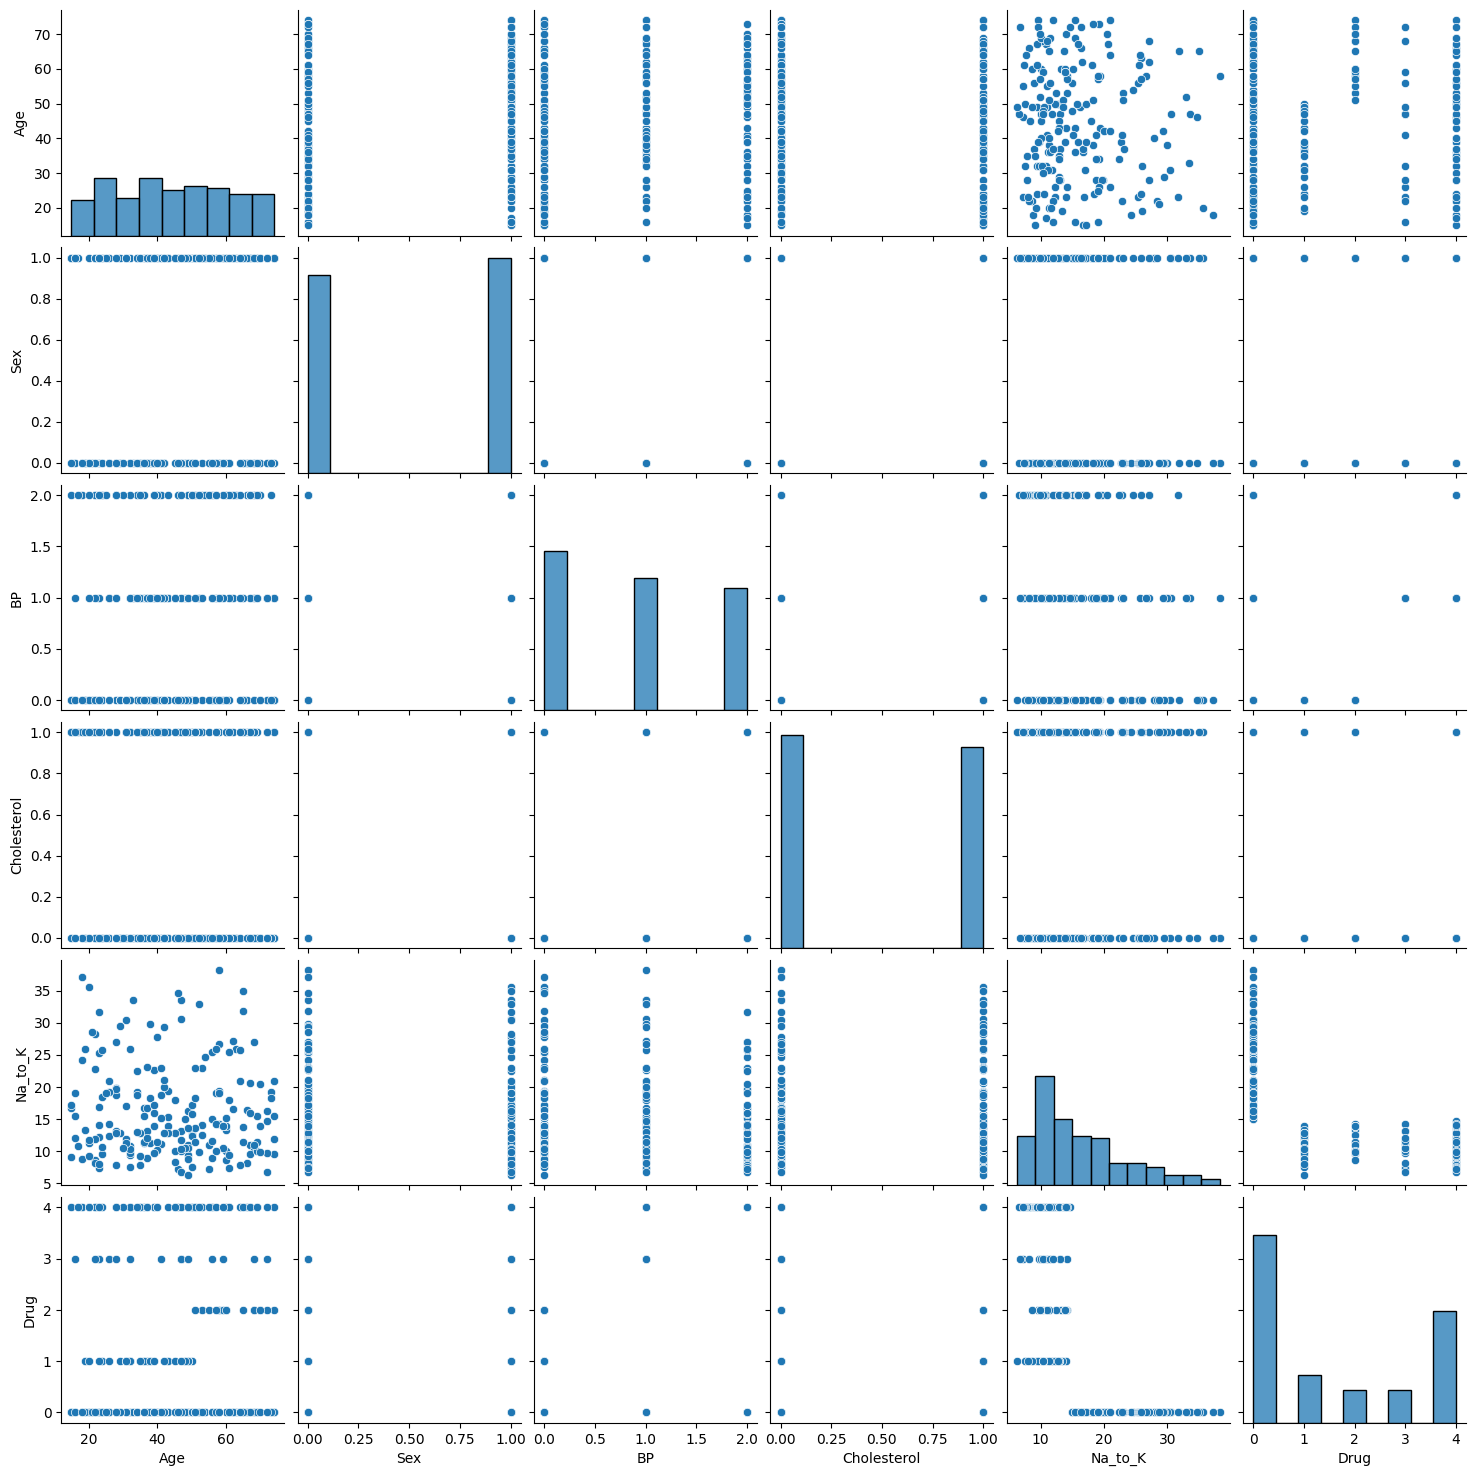

In [ ]:
sns.pairplot(df)

Na_to_K column is right skewed

In [ ]:
a=df[df.corr()]

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

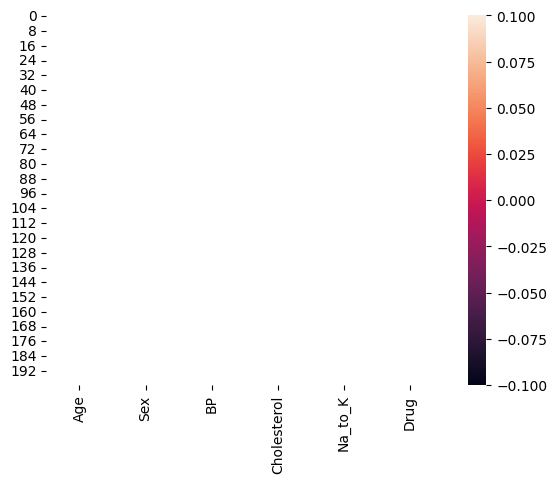

In [ ]:
sns.heatmap(a)

In [ ]:
# splitting the data values as x and y
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23.0,0,0,0,25.355
1,47.0,1,1,0,13.093
2,47.0,1,1,0,10.114
3,28.0,0,2,0,7.798
4,61.0,0,1,0,18.043
...,...,...,...,...,...
195,56.0,0,1,0,11.567
196,16.0,1,1,0,12.006
197,52.0,1,2,0,9.894
198,23.0,1,2,1,14.020


In [ ]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [ ]:
x['Sex'].unique()

array([0, 1])

In [ ]:
x['Sex'].replace(np.nan,'F',inplace=True)

In [ ]:
x['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [ ]:
#Encoding the categorical data
#Encoding the independent (output) variable
from sklearn.preprocessing import OrdinalEncoder
#categorical data

In [ ]:
ordinal_encoder=OrdinalEncoder(dtype='int64')
x.iloc[:,1:16]=ordinal_encoder.fit_transform(x.iloc[:,1:16])
#ordinal_encoder.fit_transform[x[['Sex]]]

<ipython-input-630-10754fcc93cc>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,1:16]=ordinal_encoder.fit_transform(x.iloc[:,1:16])


In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23.0,0,0,0,167
1,47.0,1,1,0,89
2,47.0,1,1,0,43
3,28.0,0,2,0,10
4,61.0,0,1,0,133
...,...,...,...,...,...
195,56.0,0,1,0,69
196,16.0,1,1,0,75
197,52.0,1,2,0,36
198,23.0,1,2,1,102


In [ ]:
label_encoder=LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt,columns=['target'])

In [ ]:
y

,target
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


<Axes: >

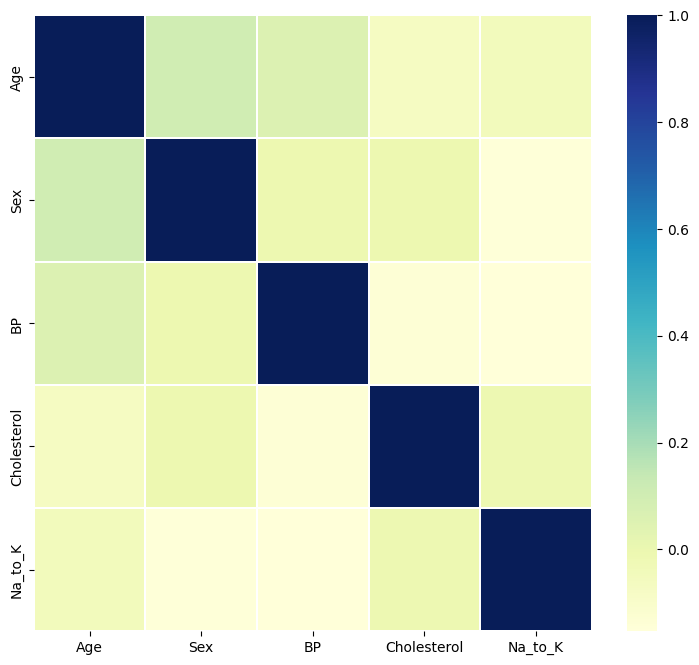

In [ ]:
#checking correlation using Heatmap
corrmat=x.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths=0.1)

Not more than 50% correlation amongnst columns

In [ ]:
# splitting the data values as x and y
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23.0,0,0,0,25.355
1,47.0,1,1,0,13.093
2,47.0,1,1,0,10.114
3,28.0,0,2,0,7.798
4,61.0,0,1,0,18.043
...,...,...,...,...,...
195,56.0,0,1,0,11.567
196,16.0,1,1,0,12.006
197,52.0,1,2,0,9.894
198,23.0,1,2,1,14.020


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    75
4    40
1    21
3    13
2    11
Name: Drug, dtype: int64

In [ ]:
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_test_bal=sc.transform(x_test_bal)

In [ ]:
x_bal

array([[-1.22143674, -0.93041477, -0.91882936,  1.5421992 ,  1.07503288],
       [ 1.30602015,  1.07478947,  0.38632598, -0.64842466, -0.48078079],
       [ 0.58388961,  1.07478947,  0.38632598, -0.64842466,  0.34781716],
       ...,
       [ 0.86390224,  1.07478947,  1.69148133, -0.64842466, -0.59009366],
       [-1.44690445,  1.07478947,  1.69148133, -0.64842466, -0.17562372],
       [-1.43408548,  1.07478947,  1.69148133, -0.64842466, -0.16415299]])

In [ ]:
columns=['Age','Sex','BP','Cholesterol','Na_to_K']

In [ ]:
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)

In [ ]:
x_bal=pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.221437,-0.930415,-0.918829,1.542199,1.075033
1,1.306020,1.074789,0.386326,-0.648425,-0.480781
2,0.583890,1.074789,0.386326,-0.648425,0.347817
3,0.222824,-0.930415,1.691481,-0.648425,-0.057712
4,0.704245,-0.930415,-0.918829,1.542199,0.211705
...,...,...,...,...,...
370,-0.534344,-0.930415,0.386326,1.542199,-0.109183
371,0.884777,-0.930415,0.386326,-0.648425,-0.938889
372,0.863902,1.074789,1.691481,-0.648425,-0.590094
373,-1.446904,1.074789,1.691481,-0.648425,-0.175624


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal)
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

((375, 5), (375,), (80, 5), (80,))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)

In [ ]:
test_score

0.95

The model is 95% accurate

In [ ]:
train_score=accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

In [ ]:
#perform feature importance
from sklearn.inspection import permutation_importance
results=permutation_importance(rfr,x_bal,y_bal,scoring='accuracy')

feature:Age                  Score: 0.0
feature:Sex                  Score: 0.07680000000000001
feature:BP                   Score: 0.21066666666666664
feature:Cholesterol          Score: 0.33866666666666667
feature:Na_to_K              Score: 0.47573333333333334


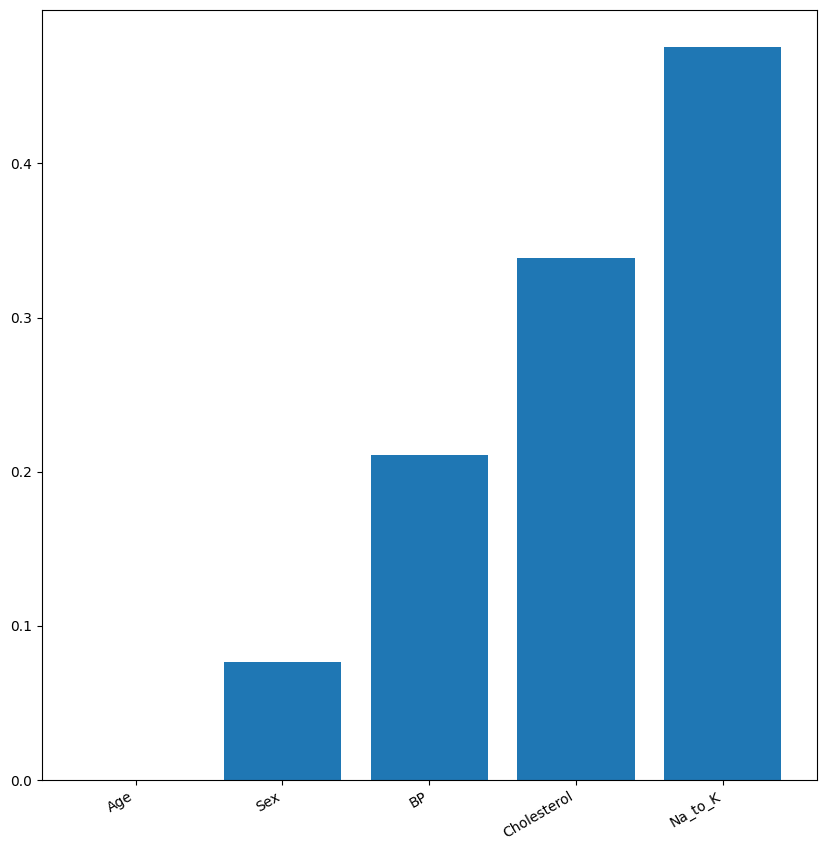

In [ ]:
#gets importance
feature_importance=['Age','Sex','BP','Cholesterol','Na_to_K']
importance=results.importances_mean
importance=np.sort(importance)
#summerize feature importance
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature:{:<20} Score: {}'.format(i,v))
#plot important feature
plt.figure(figsize=(10,10))
plt.bar(x=feature_importance,height=importance)
plt.xticks(rotation=30,ha='right')
plt.show()

Feature Na_to_K is most important

In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23.0,0,0,0,25.355
1,47.0,1,1,0,13.093
2,47.0,1,1,0,10.114
3,28.0,0,2,0,7.798
4,61.0,0,1,0,18.043


In [ ]:
x_bal.drop('Sex',axis=1,inplace=True)

In [ ]:
x_bal.drop('Age',axis=1,inplace=True)

In [ ]:
x_test_bal.drop('Sex',axis=1,inplace=True)

In [ ]:
x_test_bal.drop('Age',axis=1,inplace=True)

In [ ]:
x_bal.head()

,BP,Cholesterol,Na_to_K
0,-0.918829,1.542199,1.075033
1,0.386326,-0.648425,-0.480781
2,0.386326,-0.648425,0.347817
3,1.691481,-0.648425,-0.057712
4,-0.918829,1.542199,0.211705


Since feature importance has low scores for age and sex we are considering these columns as unimportant for output variable

In [ ]:
rfr1=RandomForestClassifier().fit(x_bal,y_bal.values.ravel())
rfr1=RandomForestClassifier()


In [ ]:
rfr1.fit(x_bal,y_bal.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred=rfr1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.50      0.56      0.53        16
           2       0.50      0.44      0.47        16
           3       0.89      1.00      0.94        16
           4       1.00      0.88      0.93        16

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



In [ ]:
train_score=accuracy_score(y_bal,rfr1.predict(x_bal))
train_score

1.0

In [ ]:
from xgboost import XGBClassifier
xgb1=XGBClassifier()
xgb1.fit(x_bal,y_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred=xgb1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.55      0.69      0.61        16
           2       0.58      0.44      0.50        16
           3       0.89      1.00      0.94        16
           4       1.00      0.88      0.93        16

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [ ]:
accuracy_score(y_test_bal,y_pred)

0.8

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
sv=SVC()

In [ ]:
sv.fit(x_bal,y_bal)

SVC()

In [ ]:
y_pred=sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.43      0.38      0.40        16
           2       0.44      0.50      0.47        16
           3       0.89      1.00      0.94        16
           4       1.00      0.88      0.93        16

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.7973333333333333

In [ ]:
params={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
        'kernel':['rbf','sqrt']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_svc=RandomizedSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
random_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sqrt']},
                   scoring='accuracy')

In [ ]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

In [ ]:
sv1=SVC(kernel='rbf',gamma=0.1,C=100)

In [ ]:
sv1.fit(x_bal,y_bal)

SVC(C=100, gamma=0.1)

In [ ]:
y_pred=sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.35      0.44      0.39        16
           2       0.25      0.19      0.21        16
           3       0.88      0.94      0.91        16
           4       1.00      0.88      0.93        16

    accuracy                           0.69        80
   macro avg       0.68      0.69      0.68        80
weighted avg       0.68      0.69      0.68        80



In [ ]:
train_score=accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.8133333333333334

In [ ]:
#saving the model
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0.35,1.0,1.5]])
print(label_encoder.inverse_transform(xgb1.predict(features)))

[0]


In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
df['Drug'].unique()

array([0, 3, 4, 1, 2])

DrugY-0-91,
drugX-4-54,
drugA-1-23,
drugC-3-16,
drugB-2-16.

In [ ]:
y.unique()

array([0, 3, 4, 1, 2])

In [ ]:
from flask import Flask,render_template,request
import numpy as np
import pickle
import pandas as pd

In [ ]:
model=pickle.load(open(r"/content/thyroid_1_model.pkl",'rb'))
le5=pickle.load(open("/content/label_encoder.pkl",'rb'))

In [ ]:
app=Flask(__name__)

In [ ]:
@app.route("/")
def about():
  return render_template('home.html')

In [ ]:
@app.route("/pred",methods=['POST','GET'])
def predict():
  x=[[float(x)for x in request.form.values()]]
  print(x)
  col=['Age','Sex','BP','Cholesterol','Na_to_K']
  x=pd.DataFrame(x,columns=col)
  #print(x.shape)
  print(x)
  pred=model.predict(x)
  pred=le5.inverse_transform(pred)
  print(pred[0])
  return render_template('submit.html',prediction_text=str(pred))

In [ ]:
if __name__=="__main__":
  app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!pip freeze > requirements.txt

In [ ]:
!sklearn.__version__

/bin/bash: line 1: sklearn.__version__: command not found


In [ ]:
!pip show sklearn

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
